<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [3]:
df = pd.read_csv('Classroom Sessions Notebooks & other GL shared docs/malaria.csv')
df

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df.eq(df, axis = 0)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False
1,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False
2,True,True,True,False,False,True,False,False,True,True,True,False,False,True,False,False
3,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,True,True,True,False,False,False,False,False,True,True,True,False,False,False,False,False
123,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
124,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
125,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df.columns[(df.isnull().sum()/len(df)*100 > 60)]

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df.isnull().sum() # Here every country will have 2 columns --- for cases and casualties

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

In [16]:
list_of_nullcounts = [df.isnull().sum().values[0] + df.isnull().sum().values[8],
                     df.isnull().sum().values[1] + df.isnull().sum().values[9],
                     df.isnull().sum().values[2] + df.isnull().sum().values[10],
                      df.isnull().sum().values[3] + df.isnull().sum().values[11],
                      df.isnull().sum().values[4] + df.isnull().sum().values[12],
                      df.isnull().sum().values[5] + df.isnull().sum().values[13],
                      df.isnull().sum().values[6] + df.isnull().sum().values[14],
                      df.isnull().sum().values[7] + df.isnull().sum().values[15]]
list_of_nullcounts
# So Nigeria is having highest null values. So, we need to take that first for the observation

[69, 90, 80, 178, 207, 124, 222, 230]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

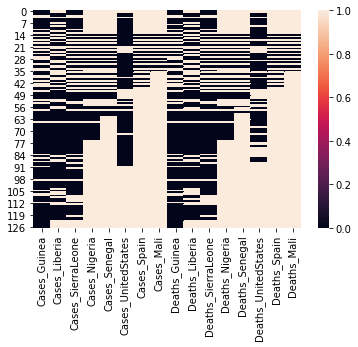

In [17]:
sns.heatmap(df.isnull())
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df.dropna(axis=0, thresh = 2)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
df.columns[(df.isnull().sum() / len(df) *100 > 60)]

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [47]:
df.drop(labels = df.columns[(df.isnull().sum() / len(df) *100 > 60)], axis = 1 )

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0,NaN
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
df.isnull().sum().values.mean()

75.0

In [52]:
df.isnull().sum() ## Here the count of Cases_Liberia is way lesser than mean. So, right skewed.

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

In [58]:
df.Cases_Liberia.fillna(df['Cases_Liberia'].median())

0       516.0
1       516.0
2      8166.0
3      8157.0
4       516.0
        ...  
122       8.0
123     516.0
124     516.0
125     516.0
126     516.0
Name: Cases_Liberia, Length: 127, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Cases_UnitedStates', ylabel='Density'>

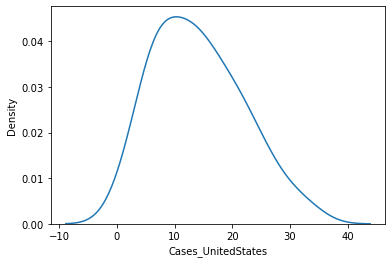

In [60]:
sns.kdeplot(x = 'Cases_UnitedStates', data = df) ## it is kind of symmetric. So, prefered to replace NaN with mean.

In [61]:
df.Cases_UnitedStates.fillna(df['Cases_UnitedStates'].mean())

0      14.068493
1      14.068493
2      20.000000
3      10.000000
4      14.068493
         ...    
122    14.068493
123    14.068493
124    14.068493
125    14.068493
126    14.068493
Name: Cases_UnitedStates, Length: 127, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
print(df['Cases_Guinea'].skew())  ## Both are right skewed. So,need to replace with median 
print(df['Deaths_Guinea'].skew())

1.0023009483886705
1.1088793090392497


In [65]:
df.Cases_Guinea.fillna(df['Cases_Guinea'].median())
df.Deaths_Guinea.fillna(df['Deaths_Guinea'].median())

0      1786.0
1      1781.0
2      1767.0
3       360.5
4       360.5
        ...  
122      66.0
123      62.0
124      60.0
125      59.0
126      29.0
Name: Deaths_Guinea, Length: 127, dtype: float64

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df1 = pd.read_csv('Classroom Sessions Notebooks & other GL shared docs/house.csv')
df1

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3
...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


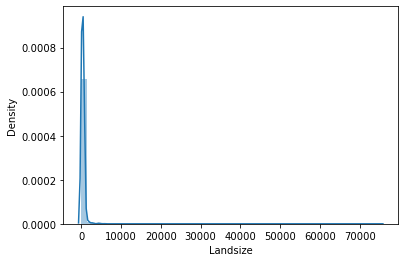

In [69]:
df1.skew()
sns.distplot(df1['Landsize'])  ## From the plot it is clear we should exempt Landsize for outlier treatment.
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

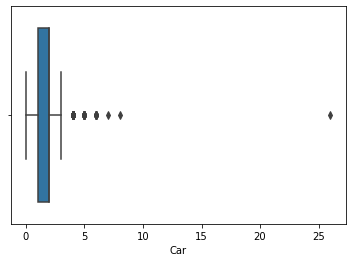

In [71]:
sns.boxplot(x = 'Car', data = df1)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

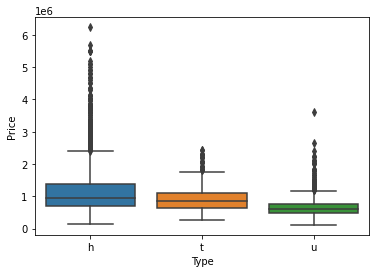

In [72]:
sns.boxplot(x = 'Type', y = 'Price', data = df1) ## Maximum outliers are present for house type H
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
from scipy.stats import zscore
df1['Z_Rooms'] = zscore(df1['Rooms'])

df1[(df1['Z_Rooms']< -3) | (df1['Z_Rooms'] > 3)] 

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Z_Rooms
82,7,h,4000000,S,South-Eastern Metropolitan,1,0,126,16.7,2,4.178001
174,7,h,1716000,S,Eastern Metropolitan,1,1,929,23.1,3,4.178001
266,6,h,1815000,S,Northern Metropolitan,1,1,1194,17.7,1,3.111173
394,6,h,1550000,S,Western Metropolitan,3,4,700,21.5,4,3.111173
469,6,h,1856000,SP,Eastern Metropolitan,1,1,581,31.0,3,3.111173
470,7,h,2705000,S,Eastern Metropolitan,3,2,873,26.2,3,4.178001
507,6,h,990000,S,Northern Metropolitan,2,2,744,13.2,3,3.111173
563,6,h,1200000,PI,Eastern Metropolitan,3,2,674,18.0,3,3.111173
584,6,h,1900000,PI,Southern Metropolitan,2,1,259,23.1,3,3.111173
667,6,h,2800000,S,Southern Metropolitan,3,1,362,17.8,1,3.111173


<AxesSubplot:xlabel='Rooms'>

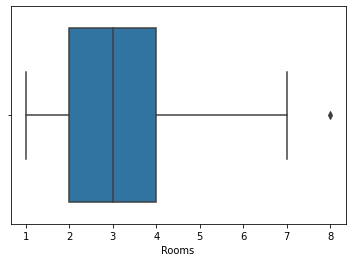

In [76]:
sns.boxplot(x = 'Rooms', data = df1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

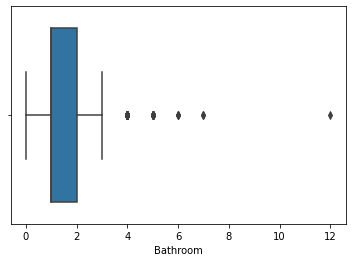

In [81]:
sns.boxplot(x = 'Bathroom', data = df1) ## Box plot only gives the presence of outliers but not count / value of outlier.
plt.show()

In [23]:
Q1 = df1['Bathroom'].quantile(0.25)
Q2 = df1['Bathroom'].quantile(0.25)
Q3 = df1['Bathroom'].quantile(0.25)
IQR = Q3 - Q1

In [25]:
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
print(ll)
print(ul)

1.0
1.0


In [26]:
len(df1[(df1['Bathroom'] < ll) | (df1['Bathroom'] > ul)])

2249

In [27]:
df1[(df1['Bathroom'] > ll) | (df1['Bathroom'] < ul)]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,prices,Dist
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,c,b
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,a,b
5,2,t,530000,S,Western Metropolitan,2,1,94,17.5,3,a,a
7,3,h,715000,SP,Western Metropolitan,2,2,400,19.9,3,b,b
8,3,h,1925000,S,Southern Metropolitan,2,1,202,23.2,4,c,c
...,...,...,...,...,...,...,...,...,...,...,...,...
4754,3,h,596000,S,Western Metropolitan,2,1,0,24.2,2,a,c
4755,2,u,420000,S,South-Eastern Metropolitan,2,1,0,16.3,3,a,a
4756,2,u,535000,S,Southern Metropolitan,2,2,0,21.4,2,a,c
4758,5,h,1682000,S,Southern Metropolitan,3,2,0,9.5,2,c,a


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
Q1 = df1['Bedroom'].quantile(0.25)
Q2 = df1['Bedroom'].quantile(0.25)
Q3 = df1['Bedroom'].quantile(0.25)
IQR = Q3 - Q1

In [29]:
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
print(ll)
print(ul)

2.0
2.0


In [30]:
len(df1[(df1['Bedroom'] < ll) | (df1['Bedroom'] > ul)])

3365

In [31]:
df1[(df1['Bedroom'] > ll) | (df1['Bedroom'] < ul)]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,prices,Dist
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,c,b
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,a,b
5,2,t,530000,S,Western Metropolitan,2,1,94,17.5,3,a,a
6,2,u,540000,S,Western Metropolitan,1,2,120,21.3,3,a,c
7,3,h,715000,SP,Western Metropolitan,2,2,400,19.9,3,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3,c,b
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4,b,a
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3,b,c
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3,b,c


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
q1=df1['Distance'].quantile(0.25)
q2=df1['Distance'].quantile(0.50)
q3=df1['Distance'].quantile(0.75)
iqr=q3-q1

In [22]:
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)
print(ll)
print(ul)

7.950000000000001
30.75


In [18]:
df2=df1[(df1['Bedroom']>30)|(df1['Bedroom']<7.0)]

In [19]:
outlier_avg=df2['Bedroom'].mean()
outlier_avg
avg=df1['Bedroom'].mean()
avg

2.941250524548888

In [21]:
print("The average distance after handling the outliers using IQR method in the feature representing the distance",
      avg-outlier_avg)

The average distance after handling the outliers using IQR method in the feature representing the distance 0.018270726569090012


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

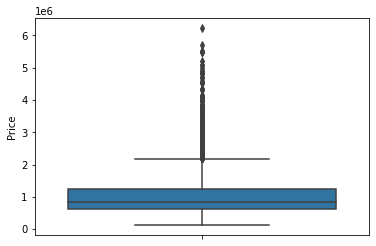

In [87]:
sns.boxplot(y ='Price', data = df1)
plt.show()

In [92]:
Q1 = df1['Price'].quantile(0.25)
Q2 = df1['Price'].quantile(0.5)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1
Upp_limit = Q3 + (1.5*IQR)
print(Upp_limit)
Upp_limit1 = Q3 + (6*IQR)       ## K range should be 6 - 6.5 to cover the dense region of outliers
print(Upp_limit1)
Upp_limit2 = Q3 + (6.5*IQR)
print(Upp_limit2)


2180625.0
4989750.0
5301875.0


<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df1['Dist'] = pd.qcut(df1['Distance'], labels = ['a','b','c'], q=3)
df1.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,prices,Dist
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,c,c
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,c,c
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,c,c
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,c,b
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,a,b


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Dist'>

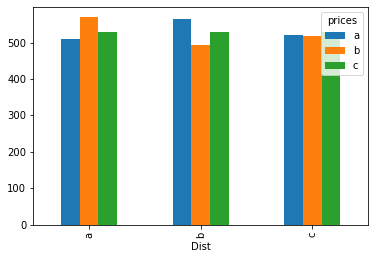

In [8]:
df1['prices']=pd.qcut(df1['Price'],labels=['a','b','c'],q=3)
pd.crosstab(df1['Dist'],df1['prices']).plot(kind='bar')

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
x=df1.drop(['Price'],axis=1)
y=df1['Price']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.8,random_state=0)

In [14]:
print(xtest.shape)
print(ytest.shape)
print(xtrain.shape)
print(ytrain.shape)

(3813, 11)
(3813,)
(953, 11)
(953,)
